In [1]:
library(tidyverse)
library(ggrepel)
if ( ! exists("code_dir")) {
    code_dir <- getwd()
    base_dir <- gsub("/plotting_codes", "", code_dir)
    out.dir <- file.path(base_dir, '/9_Figures/1_IL2RAKO')
}

── Attaching packages ─────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [85]:
il2rako.sc.de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/2_DE'
cp1 <- file.path(il2rako.sc.de.dir, '/Cluster_vs_Cluster_newNames/P2/P2_vs_P0_differential.csv')
cp2 <- file.path(il2rako.sc.de.dir, '/Cluster_vs_Cluster_newNames/P1/P1_vs_P0_differential.csv')

cp1.df <- read_csv(cp1)
cp1.df <- read_csv(cp1) %>% rowwise() %>% mutate(maxAvgExpr=max(P0, P2)) # Change the column names for dataset
cp1.df <- cp1.df %>% filter(maxAvgExpr > 0.01)

cp2.df <- read_csv(cp2) 
cp2.df <- read_csv(cp2) %>% rowwise() %>% mutate(maxAvgExpr=max(P1, P0)) # Change the column names for dataset
cp2.df <- cp2.df %>% filter(maxAvgExpr > 0.01)

cp1.df <-  cp1.df %>% 
        filter(`t-test_padj` <= 0.1) %>% 
        select(one_of(c(colnames(cp1.df)[1], "t-test_score")))


cp2.df <- cp2.df %>% 
        filter(`t-test_padj` <= 0.1) %>%
        select(one_of(c(colnames(cp2.df)[1], "t-test_score")))

colnames(cp1.df) <- c("gene_name", "log2FC1")
colnames(cp2.df) <- c("gene_name", "log2FC2")

scatter.df <- cp1.df %>% full_join(cp2.df, by="gene_name")


── Column specification ────────────────────────────────────────────
cols(
  gene_names = col_character(),
  P0 = col_double(),
  P2 = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)



── Column specification ────────────────────────────────────────────
cols(
  gene_names = col_character(),
  P0 = col_double(),
  P2 = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)



── Column specificati

In [101]:
# Annotate selected genes
anno.genes <- c("Tcf7", "Chd7", "Aff3", "Batf3", "Runx3", "Il2ra")
scatter.anno.df <- scatter.df %>% filter(gene_name %in% anno.genes)

scatter.df$Highlight <- ifelse(scatter.df$gene_name %in% anno.genes, "Yes", "No") 
scatter.df <- scatter.df  %>% replace(is.na(.), 0)

Warning message:
“Removed 3 rows containing missing values (geom_label_repel).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


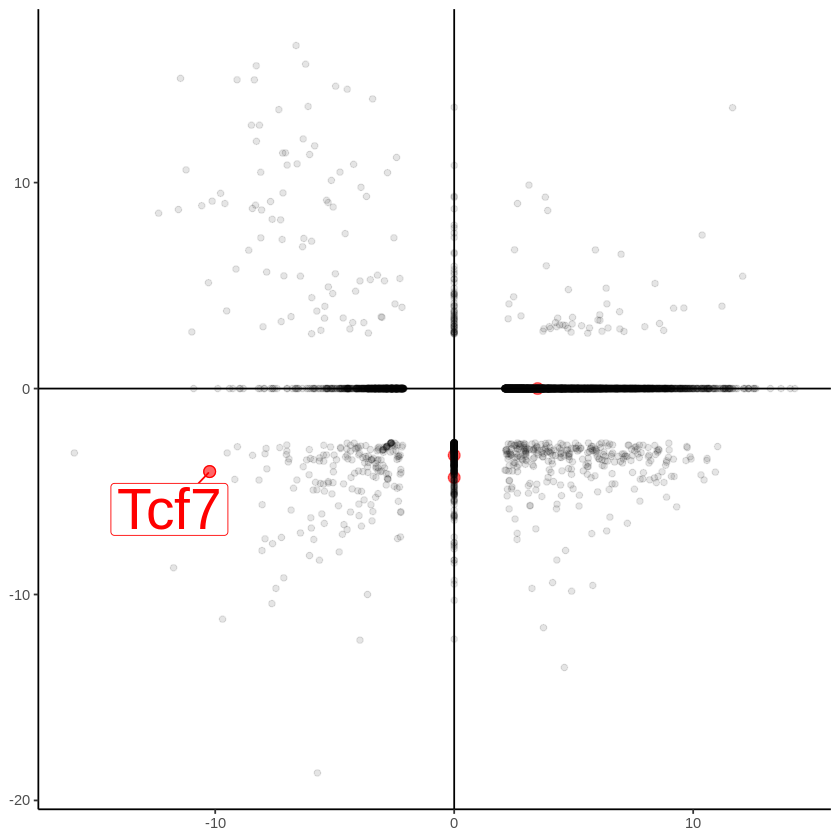

In [102]:
scatter.plot <- ggplot(scatter.df, aes(x=log2FC1, y=log2FC2, color=Highlight, alpha=Highlight, size=Highlight)) +
    geom_point() + 
    scale_color_manual(values=c( "black", "red")) +
    scale_alpha_manual(values=c(0.1, 0.6)) +
    scale_size_manual(values=c(1.5,3)) +
    
    #xlim(c(-7, 7)) + ylim(c(-7,7)) +
    geom_vline(xintercept=0) +
    geom_hline(yintercept=0) +
    
    geom_label_repel(data=scatter.anno.df, size=12, alpha=1, force=80, max.iter=100000,
                          aes(x=log2FC1, y=log2FC2, label=gene_name)) +
    geom_point(data=scatter.anno.df, 
               aes(x=log2FC1, y=log2FC2), pch=1, size=3, alpha=1) +
    
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.position = "none")
scatter.plot